**TITLE: PREDICTION OF WHETHER THE INCOME EXCEEDS $50K/Year BASED ON CENSUS DATA** 

**INTRODUCTION**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. Naïve Bayes classification is based on applying Bayes’ theorem with strong independence assumption between the features. Naïve Bayes classification produces good results when we use it for textual data analysis such as Natural Language Processing.

Naïve Bayes models are also known as simple Bayes or independent Bayes. All these names refer to the application of Bayes’ theorem in the classifier’s decision rule. Naïve Bayes classifier applies the Bayes’ theorem in practice. This classifier brings the power of Bayes’ theorem to machine learning.

Naïve Bayes Classifier uses the Bayes’ theorem to predict membership probabilities for each class such as the probability that given record or data point belongs to a particular class. The class with the highest probability is considered as the most likely class. This is also known as the Maximum A Posteriori (MAP).

The MAP for a hypothesis with 2 events A and B is

MAP (A)

= max (P (A | B))

= max (P (B | A) * P (A))/P (B)

= max (P (B | A) * P (A))

Here, P (B) is evidence probability. It is used to normalize the result. It remains the same, So, removing it would not affect the result.

Naive Bayes Classifier assumes that all the features are unrelated to each other. Presence or absence of a feature does not influence the presence or absence of any other feature.


**PROBLEM STATEMENT**

We want to predict the  probability whether a person makes over 50K a year and classify them into one of the classes based on their characterstics.

**PACKAGES AND LIBRARIES**

In [ ]:
#Importing all the necessary packages and libraries
import numpy as np
import pandas as pd

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Importing the package for splitting the data into train and test ssamples.
from sklearn.model_selection import train_test_split

#For model evaluation metrics 
from sklearn.metrics import classification_report 

#For encoding categorical features from strings to number arrays.
from sklearn.preprocessing import OrdinalEncoder 

#Importing Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

**DATA DESCRIPTION**

This data set consist of records of 32560 people and their personal details i.e.total 15 of their characterstics are listed. 

The characterstics of indiviaduals are,

age (age of the person) [Continuous variable]

workclass (work class of a person like, govt., private etc.) [Categorical in nature]

education (level of education an individual took) [Categorical in nature]

fnlwgt [Continuous variable]

sex (gender of an individual) [Categorical in nature]

race (race of an individual) [Categorical in nature]

native_country (native country and idividual belongs to) [Categorical in nature]

income (income class to which an individual belong i.e. if he earn <=50K or >50K on yearly basis) [Categorical in nature]

education_num [Continuous variable]

marital_status (This is the marital status of an individual) [Categorical in nature]

occupation (Individual's occupation) [Categorical in nature]

relationship [Categorical in nature]

hours_per_Week (no. of hours an individual work in a week)
[Continuous variable]

capital_gain [Continuous variable]

capital_loss [Continuous variable]



In [ ]:
#Importing the adult dataset.
data=pd.read_csv("/content/adult.csv")

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
data.shape

(32560, 15)

It is observed that the dataset comprises of 32560 records and 15 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if there is any null values in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Preview the dataset
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


**DATA PRE PROCESSING**

We can see that the dataset does not have proper column names. We should give proper names to the columns. 

In [ ]:
#Renaming the columns.
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

data.columns = col_names

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [ ]:
#Previewing the dataset again
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Our study variable in the analysis is Y-income level of a person which takes categories **>50K and <=50K** i.e the person makes over 50K income or less than 50K income.

CODING CATEGORICAL VARIABLES

In [ ]:
#Coding the categories under occupation
data['occupation']=np.where(data['occupation'] ==' ?', 'Unknown', data['occupation'])


In [ ]:
#Coding the categories under marital_status
data['marital_status']=np.where(data['marital_status'] ==' Married-civ-spouse', 'Married', data['marital_status'])
data['marital_status']=np.where(data['marital_status'] ==' Married-spouse-absent', 'Married', data['marital_status'])
data['marital_status']=np.where(data['marital_status'] ==' Married-AF-spouse', 'Married', data['marital_status'])
data['marital_status']=np.where(data['marital_status'] ==' Never-married', 'Single', data['marital_status'])

In [ ]:
#Coding the categories under workclass
data['workclass']=np.where(data['workclass'] ==' Self-emp-not-inc', 'Self-Employed', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' Self-emp-inc', 'Self-Employed', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' Without-pay', 'Self-Employed', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' State-gov', 'Government', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' Federal-gov', 'Government', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' Local-gov', 'Government', data['workclass'])
data['workclass']=np.where(data['workclass'] ==' ?', 'Unknown', data['workclass'])

In [ ]:
#Coding the categories under education.
data['education']=np.where(data['education'] ==' HS-grad', 'Higher Secondary', data['education'])
data['education']=np.where(data['education'] ==' 11th', 'Higher Secondary', data['education'])
data['education']=np.where(data['education'] ==' 12th', 'Higher Secondary', data['education'])
data['education']=np.where(data['education'] ==' 9th', 'Middle', data['education'])
data['education']=np.where(data['education'] ==' 7th-8th', 'Middle', data['education'])
data['education']=np.where(data['education'] ==' 10th', 'Middle', data['education'])
data['education']=np.where(data['education'] ==' 1st-4th', 'Primary', data['education'])
data['education']=np.where(data['education'] ==' 5th-6th', 'Primary', data['education'])
data['education']=np.where(data['education'] ==' 9th', 'Middle', data['education'])
data['education']=np.where(data['education'] ==' Some-college', ' Bachelors', data['education'])

In [ ]:
#Coding the categories under education.
data['sex']=np.where(data['sex'] ==' Female', 0, data['sex'])
data['sex']=np.where(data['sex'] ==' Male', 1, data['sex'])

#Converting variable sex from object to numeric
data['sex']=pd.to_numeric(data['sex'])

In [ ]:
#Obtaining the dataset.
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,workclass_ Never-worked,workclass_ Private,workclass_Government,workclass_Self-Employed,workclass_Unknown,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ Masters,education_ Preschool,education_ Prof-school,education_Higher Secondary,education_Middle,education_Primary,marital_status_ Divorced,marital_status_ Separated,marital_status_ Widowed,marital_status_Married,marital_status_Single,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,occupation_Unknown,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,50,Self-Employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38,Private,215646,Higher Secondary,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,53,Private,234721,Higher Secondary,7,Married,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,0,0,0,40,United-States,<=50K,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Checking the data types and if there exist any null values
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            32560 non-null  int64 
 1   workclass                      32560 non-null  object
 2   fnlwgt                         32560 non-null  int64 
 3   education                      32560 non-null  object
 4   education_num                  32560 non-null  int64 
 5   marital_status                 32560 non-null  object
 6   occupation                     32560 non-null  object
 7   relationship                   32560 non-null  object
 8   race                           32560 non-null  object
 9   sex                            32560 non-null  int64 
 10  capital_gain                   32560 non-null  int64 
 11  capital_loss                   32560 non-null  int64 
 12  hours_per_week                 32560 non-null  int64 
 13  n

Thus, now all the necessary dummy variables are created , the categorical variables are coded and there does not exist any null values thus we go for the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
data.describe()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,0.669195,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,0.470510,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,1.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,1.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000


From th above summary it is observed that the variable age and hour_per_week i.e. the no. of hours they work in a week has mean = meadian, from which we can assume that the age and hour_per _week are normally distributed.

EXPLORING THE STUDY VARIABLE

In [ ]:
#Obtaining the count of person under each income class.
data['income'].value_counts()

 <=50K    24719
 >50K      7841
Name: income, dtype: int64

Thus, it observed that there are 24719 person who earn less than 50K salary and around more 7841 people makes salary above 50K in a year.

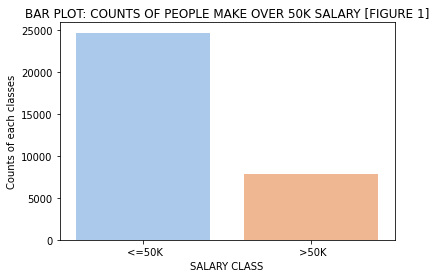

In [ ]:
#Obtaining the bar plot of people different classes of salary i.e. >50 & <=50.
sns.countplot(x='income',data=data, palette="pastel")
plt.title("BAR PLOT: COUNTS OF PEOPLE MAKE OVER 50K SALARY [FIGURE 1]")
plt.ylabel("Counts of each classes")
plt.xlabel("SALARY CLASS")
plt.show()

In [ ]:
#Obtaining the average of each class of people with respect to salary.
data.groupby('income').mean()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week
income,,,,,,,
<=50K,36.783648,190345.429467,9.594927,0.611958,148.670537,53.145071,38.840163
>50K,44.249841,188005.000000,11.611657,0.849637,4006.142456,195.001530,45.473026


Thus, from the above table on observing the age we observe that average age for the class of people earning more than 50K is 44 years which means that the age of most of the people who earns more than 50K lies around the age of 44 years thus we could conclude that their salary is higher because of experience they have. We also observed that the average age of people earning less than 50K is 36 year which means that the age of the people earning below 50K is around 36 years. 

In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.sex,data.income)

income,<=50K,>50K
sex,,
0,9592,1179
1,15127,6662


Text(0, 0.5, 'Frequency of people unde each gender')

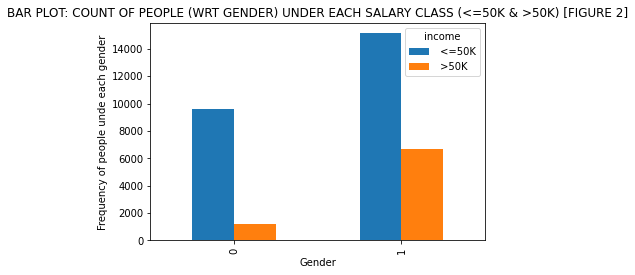

In [ ]:
#BAR PLOT FOR PEOPLE UNDER SALARY CLASS WITH RESPECT TO GENDER
pd.crosstab(data.sex,data.income).plot(kind='bar')
plt.title('BAR PLOT: COUNT OF PEOPLE (WRT GENDER) UNDER EACH SALARY CLASS (<=50K & >50K) [FIGURE 2]')
plt.xlabel('Gender')
plt.ylabel('Frequency of people unde each gender')

Thus, we observed that among the people earing more than 50K 1179 are female and among 6662 are male, thus it is observed more are female who earns more than 50K.

Text(0, 0.5, 'Frequency of people')

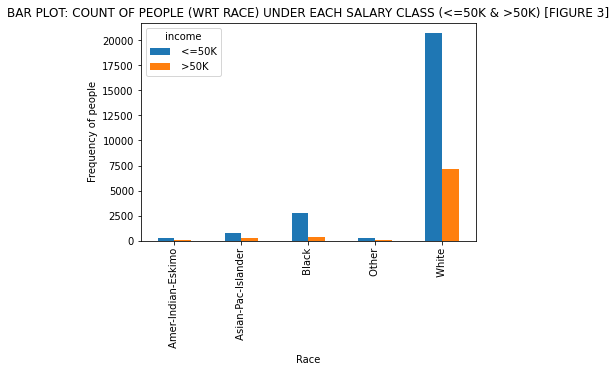

In [ ]:
#BAR PLOT FOR PEOPLE UNDER SALARY CLASS WITH RESPECT TO RACE
pd.crosstab(data.race,data.income).plot(kind='bar')
plt.title('BAR PLOT: COUNT OF PEOPLE (WRT RACE) UNDER EACH SALARY CLASS (<=50K & >50K) [FIGURE 3]')
plt.xlabel('Race')
plt.ylabel('Frequency of people')

Thus it is observed from the above figure that most of the people are whites and among whites more of them earns salary below 50K and very few of them earns salary above 50K which could be due to that very less among all are experienced and educated and hence very few earn more than 50K.

**ANALYSIS**

In [ ]:
#Installing the plotly package
!pip install plotly

**NAIVE BAYES CLASSIFIER: APPROACH 1**

GAUSSIAN NAIVE BAYES CLASSIFIER

In [ ]:
#Splitting the dataset into study and independent variables.
X=data[['age','hours_per_week']]#continuous variables
y=data['income'].values

In [ ]:
#Creating a function that will handle sample splitting, model fitting and report printing
def mfunc(X, y, typ):
#Splitting the data into train and test data.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
#Fitting the model
  model = typ
  clf = model.fit(X_train, y_train)
#Predicting class labels in a test data
  pred_labels = model.predict(X_test)
#Printing the model attributes
  print('Classes:', clf.classes_) #class labels known to the classifier
  if str(typ)=='GaussianNB()':
    print('Class Priors: ',clf.class_prior_) # prior probability of each class.
# Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
# Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))
# Return relevant data for chart plotting
  return X_train, X_test, y_train, y_test, clf, pred_labels

In [ ]:
# Fit the model and print the result.
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, GaussianNB())

Classes: [' <=50K' ' >50K']
--------------------------------------------------------
Accuracy Score:  0.7613636363636364
--------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.77      0.98      0.86      4957
        >50K       0.50      0.07      0.12      1555

    accuracy                           0.76      6512
   macro avg       0.64      0.52      0.49      6512
weighted avg       0.71      0.76      0.68      6512



From the above table it is observed that the precision for both the class '<=50K' is  0.77 and class '>50K' is 0.50 which indicates that the model is good in classifying the groups as a correct one

Also we observe that recall for the class '<=50K' is 0.98 and class '>50K' is 0.07 which indicates that the ability of a classifier to make correct prediction is  good in case of people earnin<=50K but not in case of people earnin >50K. 

It is observed that F1score is 0.86  and 0.12 respectively for each of a group of people making <=50K and people making >50K which indicates that more weight is given to precision and less weight is given to recall.

Since we observe that both the average measures are not equal therefore our classification is not balanced.

Also we observe that the accuracy measure is .76 thus our model is good.

Thus from all the above results we conclude that our binary classifier is moderately good.

BERNUOLLI NAIVE BAYES CLASSIFIER

In [ ]:
#Splitting the dataset into study and independent variables.
X=data[['sex']]#continuous variables
y=data['income'].values

In [ ]:
#Creating a function that will handle sample splitting, model fitting and report printing
def mfunc(X, y, typ):
#Splitting the data into train and test data.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
#Fitting the model
  model = typ
  clf = model.fit(X_train, y_train)
#Predicting class labels in a test data
  pred_labels = model.predict(X_test)
#Printing the model attributes
  print('Classes:', clf.classes_) #class labels known to the classifier
  if str(typ)=='BernoulliNB()':
    print('Class Priors: ',clf.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf.class_log_prior_)
# Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
# Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))
# Return relevant data for chart plotting
  return X_train, X_test, y_train, y_test, clf, pred_labels

In [ ]:
# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, BernoulliNB())

Classes: [' <=50K' ' >50K']
Class Log Priors:  [-0.27618009 -1.42161605]
--------------------------------------------------------
Accuracy Score:  0.7612100737100738
--------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      4957
        >50K       0.00      0.00      0.00      1555

    accuracy                           0.76      6512
   macro avg       0.38      0.50      0.43      6512
weighted avg       0.58      0.76      0.66      6512



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



From the above table it is observed that the precision for both the class '<=50K' is 0.76 and class '>50K' is 0 which indicates that the model is good in classifying in people earning <=50K in the correct group while model is not good at classifying in people earning <=50K in the correct group

Also we observe that recall for the class '<=50K' is 1and class '>50K' is 0 which indicates that the ability of a classifier to make correct prediction is  good in case of people earning <=50K and is bad in case of classifying people earning >50K. 

It is observed that F1score is 0.86  and 0 respectively for each of a group of people making <=50K and people making >50K which indicates that more weight is given to precision and less weight is given to recall.

Since we observe that both the average measures are not equal therefore our classification is not balanced.

Also we observe that the accuracy measure is .76 thus our model is good.

Thus from all the above results we conclude that our binary classifier is moderately good.

MUTINOMIAL NAIVE BAYES CLASSIFIER

In [ ]:
#Splitting the dataset into study and independent variables.
X=data[['marital_status','education']]#continuous variables
y=data['income'].values

In [ ]:
#Encoding the categorical variables
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [ ]:
#Creating a function that will handle sample splitting, model fitting and report printing
def mfunc(X, y, typ):
#Splitting the data into train and test data.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
#Fitting the model
  model = typ
  clf = model.fit(X_train, y_train)
#Predicting class labels in a test data
  pred_labels = model.predict(X_test)
#Printing the model attributes
  print('Classes:', clf.classes_) #class labels known to the classifier
  if str(typ)=='CategoricalNB()':
    print('Class Priors: ',clf.class_prior_) # prior probability of each class.
  else:
    print('Class Log Priors: ',clf.class_log_prior_)
# Use score method to get accuracy of the model
  print('--------------------------------------------------------')
  score = model.score(X_test, y_test)
  print('Accuracy Score: ', score)
  print('--------------------------------------------------------')
# Look at classification report to evaluate the model
  print(classification_report(y_test, pred_labels))
# Return relevant data for chart plotting
  return X_train, X_test, y_train, y_test, clf, pred_labels

In [ ]:
# Fit the model and print the result
X_train, X_test, y_train, y_test, clf, pred_labels = mfunc(X, y, CategoricalNB())

Classes: [' <=50K' ' >50K']
Class Log Priors:  [-0.27618009 -1.42161605]
--------------------------------------------------------
Accuracy Score:  0.7910012285012284
--------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.79      0.98      0.88      4957
        >50K       0.78      0.17      0.28      1555

    accuracy                           0.79      6512
   macro avg       0.79      0.58      0.58      6512
weighted avg       0.79      0.79      0.74      6512



From the above table it is observed that the precision for both the class '<=50K' is 0.79 and class '>50K' is 0.78 which indicates the good case thus the  ability of a classifier not to make a wrong prediction is good. 

Also we observe that recall for the class '<=50K' is 0.98 and class '>50K' is 0.17 which indicates that the ability of a classifier to make correct prediction is  good. 

It is observed that F1score is 0.88  and 0.28 respectively for each of a group of people making <=50K and people making >50K which indicates that more weight is given to precision and less weight is given to recall.

Since we observe that both the average measures are not equal therefore our classification is not balanced.

Also we observe that the accuracy measure is .79 thus our model is good.

Thus from all the above results we conclude that our binary classifier is moderately good.

**NAIVE BAYES CLASSIFIER: APPROACH 2 (HYBRID)**

In [ ]:
#Selecting data for modelling
X_G=data[['age','hours_per_week']]#Continuous variables
X_C=data[['capital_gain','education']]#Categorical variables
y=data['income'].values


In [ ]:
#Encoding the categorical variables
enc = OrdinalEncoder()
X_C = enc.fit_transform(X_C)

In [ ]:
#Combining all the four variables into one array
X=np.c_[X_G,X_C[:,0].ravel(),X_C[:,1].ravel()]

In [ ]:
#Splitting the data into training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#Fitting the models

#Now we use the gaussian model for continuous independent variable.
model_G = GaussianNB()
clf_G = model_G.fit(X_train[:,0:2],y_train)

#Categorical model for discrete independent variable.
model_C =CategoricalNB()
clf_C = model_C.fit(X_train[:,2:4],y_train)

In [ ]:
#Getting probability predictions from each model

#On training data
G_train_probas = model_G.predict_proba(X_train[:,0:2])
C_train_probas = model_G.predict_proba(X_train[:,2:4])

#On testing data
G_test_probas = model_G.predict_proba(X_test[:,0:2])
C_test_probas = model_G.predict_proba(X_test[:,2:4])

In [ ]:
#Combining probabilities predicted for class 1 from both the models into a 2D array.
X_new_train = np.c_[(G_train_probas[:,1],C_train_probas[:,1])]
X_new_test = np.c_[(G_test_probas[:,1],C_test_probas[:,1])]

In [ ]:
#Fitting gaussian model on X_new
model = GaussianNB()
clf = model.fit(X_new_train,y_train)

In [ ]:
#Predict class labels on test data
pred_labels = model.predict(X_new_test)
pred_labels

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [ ]:
#Obtaining the results from the model built using hybrid approach.
print('Classes: ', clf.classes_) #gives class labels known to the classifier
print('Class Priors: ',clf.class_prior_) #probability of each calss

#Obtaing the accuracy of the model using score method.
print("-------------------------------------------------------------------------")
score = model.score(X_new_test,y_test)
print("Accuracy Score: ", score)
print("-------------------------------------------------------------------------")

#Obtaining the classification report to evaluate the model
print(classification_report(y_test,pred_labels))

Classes:  [' <=50K' ' >50K']
Class Priors:  [0.75867629 0.24132371]
-------------------------------------------------------------------------
Accuracy Score:  0.7628992628992629
-------------------------------------------------------------------------
              precision    recall  f1-score   support

       <=50K       0.79      0.93      0.86      4957
        >50K       0.51      0.23      0.32      1555

    accuracy                           0.76      6512
   macro avg       0.65      0.58      0.59      6512
weighted avg       0.73      0.76      0.73      6512



From the above table it is observed that the precision for both the class '<=50K' is 0.78 and class '>50K' is 0.49 which indicates the good case thus the  ability of a classifier not to make a wrong prediction is good. 

Also we observe that recall for the class '<=50K' is 0.94 and class '>50K' is 0.17 which indicates that the ability of a classifier to make correct prediction is  good. 

It is observed that F1score is 0.86  and 0.25 respectively for each of a group of people making <=50K and people making >50K which indicates that more weight is given to precision and less weight is given to recall.

Since we observe that both the average measures are not equal therefore our classification is not balanced.

Also we observe that the accuracy measure is .75 thus our model is good.

Thus from all the above results we conclude that our binary classifier is moderately good.

**CONCLUSION**

On comparison we observed that both the approaches of buiding the naive bayes classifier gives almost the same result and it is obtained that our classifier Is moderately good.